In [1]:
# Read the February 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-05-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,L_count,M_count,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma
0,2012-05-01 00:00:00,10.896,0.579,3.664,16.120,97.298,26.621,4.802,11.427,1.174,...,79,24,25,27,47,277,9,0.136681,1713,234.134000
1,2012-05-01 00:30:00,9.546,0.544,3.423,16.023,124.740,22.481,7.386,10.978,1.257,...,79,24,25,27,47,276,9,0.186747,1712,319.711001
2,2012-05-01 01:00:00,8.764,0.623,3.154,16.203,114.255,22.111,6.795,10.524,1.033,...,79,24,25,27,47,276,9,0.168866,1712,289.098000
3,2012-05-01 01:30:00,8.223,0.553,2.716,14.019,100.472,20.783,8.618,10.670,1.053,...,79,24,25,27,47,276,9,0.152494,1712,261.069000
4,2012-05-01 02:00:00,8.218,0.587,2.872,14.400,93.479,19.942,6.647,9.407,0.971,...,79,24,25,27,47,276,9,0.139173,1712,238.264001


In [3]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [4]:
# Create a dataframe representing energy consumption for May 5th 2012, the day
# of FA cup final

df_fa_cup_05_05 = df.loc[df['day']==5]
df_fa_cup_05_05 = df_fa_cup_05_05.set_index(df_fa_cup_05_05["tstamp"])
df_fa_cup_05_05.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-05-05 00:00:00,13.385,0.701,4.460,19.378,112.911000,33.085,6.666,14.655,2.274,...,28,28,49,319,10,0.152788,1880,287.242000,5,0:00
0:30,2012-05-05 00:30:00,13.051,0.516,3.962,20.545,150.517000,30.491,11.014,13.725,1.673,...,28,28,49,319,10,0.203636,1879,382.632001,5,0:30
1:00,2012-05-05 01:00:00,10.203,0.666,4.101,18.181,139.627000,29.487,9.841,11.800,1.910,...,28,28,49,319,10,0.185978,1879,349.452000,5,1:00
1:30,2012-05-05 01:30:00,9.573,0.590,3.794,16.635,126.690001,29.657,8.189,10.887,1.823,...,28,28,49,319,10,0.169476,1879,318.445002,5,1:30
2:00,2012-05-05 02:00:00,9.813,0.530,3.660,16.680,116.167000,26.906,7.497,11.794,1.811,...,28,28,49,319,10,0.154325,1879,289.976000,5,2:00


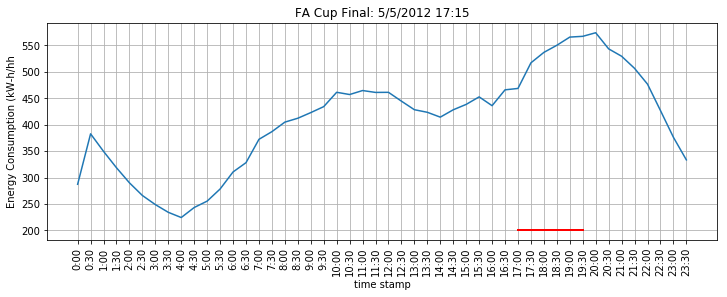

In [5]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_fa_cup_05_05["tstamp"],df_fa_cup_05_05["sigma"])
plt.xticks(rotation='vertical')
plt.title("FA Cup Final: 5/5/2012 17:15")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['17:00', '19:30'], [200, 200], color='r', linestyle='-', linewidth=2)
plt.show()

In [6]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_fa_cup_05_05["A_sigma"] + df_fa_cup_05_05["B_sigma"] + df_fa_cup_05_05["C_sigma"]
Acorn2  = df_fa_cup_05_05["D_sigma"] + df_fa_cup_05_05["E_sigma"]
Acorn3  = df_fa_cup_05_05["F_sigma"] + df_fa_cup_05_05["G_sigma"] + df_fa_cup_05_05["H_sigma"] \
                                           + df_fa_cup_05_05["I_sigma"] + df_fa_cup_05_05["J_sigma"]
Acorn4  = df_fa_cup_05_05["K_sigma"] + df_fa_cup_05_05["L_sigma"] + df_fa_cup_05_05["M_sigma"] \
                                           + df_fa_cup_05_05["N_sigma"]
Acorn5  = df_fa_cup_05_05["O_sigma"] + df_fa_cup_05_05["P_sigma"] + df_fa_cup_05_05["Q_sigma"]

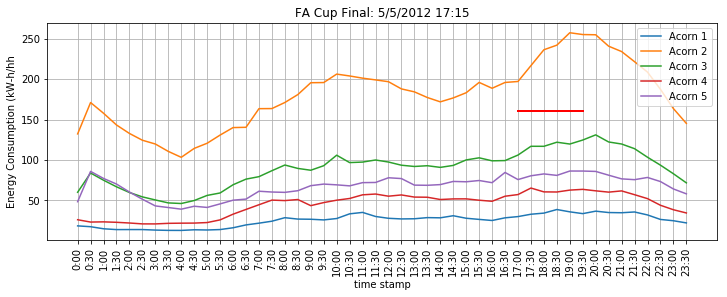

In [7]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("FA Cup Final: 5/5/2012 17:15")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['17:00', '19:30'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="upper right")
plt.show()

In [8]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

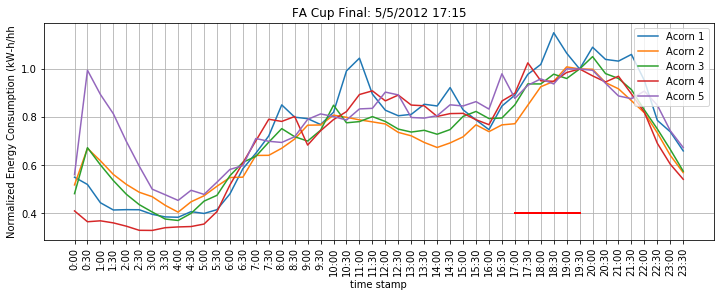

In [9]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_fa_cup_05_05["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("FA Cup Final: 5/5/2012 17:15")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['17:00', '19:30'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="upper right")
plt.show()